# ROBOTIC GRIPPER

## A Robotic Gripper Operated by Gestures Learned Trough DeepLearning

## Phase 3 Implementation: Using the Model to Operate the Gripper Using Gestures

This project allows a user to control a robotic gripper using gestures captured by a webcam.

## 1 - How does it works

The project is diveded in 3 main phases, in order to fulfill user requests:

- Phase 1: Images must be captured from the webcam to compound a labeled gestures dataset.
  The dataset will feed trainning and testing datasets to be used in supervised learning.
    
- Phase 2: A deep learning model, basically a neural network, will be created and used to train the gestures recognition, using keras and tensorflow.
    
- Phase 3: A program will be used to sequentially capture webcam images.
  The images will be classifyed by the model trainned in Phase 2, and the result will be used to operate the robotic gripper.
  
  **This notebook implements the phase 3 of the project, there are two other notebooks to be executed before  this one.**

In [1]:
%load_ext autoreload
%autoreload 2

## 2 - Operate the robotic gripper using gestures posed in front of a webcam

### Packages

In [2]:
%pylab inline 
import cv2
from IPython.display import clear_output
import time
from datetime import datetime
import os
import numpy as np
import shutil
import serial
from keras.models import load_model
import utils

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


The function **start_operation** generates commands and send them to the Arduino board, via USB.
It has a logical parameter named **check_predictions_only**, that is false by default. If it is passed with true value, the function does it work jumping all Arduino comunnication. This is just to allow testing the result of a model without the need of assembling the robotic grip part of the project.

In [3]:
def startOperation(model, check_predictions_only = False):
    if not check_predictions_only:
        #start serial
        arduinoSerial= serial.Serial('/dev/ttyACM0', 9600, timeout=1)
        print('Serial connection: ', arduinoSerial.name)
    else:
        arduinoSerial= None
    # variables to define play warning sound
    frequency = 100 # Hertz
    duration  = 50 # milliseconds
    gesture_code = ' '
    #using webcam 0.
    #in some systems webcam may be under different numbers, i.e, 1 or 2 or 3 ...
    vid = cv2.VideoCapture(0)
    start_time = time.time()
    try:
        while True:
            # Capture frame-by-frame
            ret, frame = vid.read()
            if not ret:
                # Release the Video Device if ret is false
                vid.release()
                # Message to be displayed after releasing the device
                print("Released Video Resource due to capture fail!")
                break
            # Convert the image from OpenCV BGR format to matplotlib RGB format
            # to display the image
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # check if it is time to save frame to a file
            elapsed_time = time.time() - start_time
            if elapsed_time > 2:
                # make sound to indicate action
                os.system('play -n synth %s sin %s' % (duration/1000, frequency))
                # predict
                gesture_label = predict(model, arduinoSerial, frame, check_predictions_only)
                #restart the timer
                start_time = time.time()
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Gripper Gesture: (pred: " + gesture_label + ')')
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
    except KeyboardInterrupt:
        # Message to be displayed after releasing the device
        print("keyboard interrupted!")
    # Release the Video Device
    vid.release()

In [4]:
def predict(model, arduinoSerial, frame, check_predictions_only = False):
    # The current frame of gesture
    gesture_code = ' '
    gesture_label = ' '
    labels = ['nothing', 'left', 'right', 'grip', 'loose', 'foward', 'back', 'up', 'down']
    rlabels = ['n', 'l', 'r', 'g', 'o', 'f', 'b', 'u', 'd']
    try:
        frame = utils.preprocess(frame) # apply the preprocessing
        frame = np.array([frame])       # the model expects 4D array
        # predict the gesture
        #gesture = float(model.predict(frame, batch_size=1))
        gesture = np.argmax(model.predict(frame, batch_size=1))
        #if(gesture <= 0.8):
        #    gesture_code = 'n';
        #elif(gesture <= 1.8):
        #    gesture_code = 'l';
        #elif(gesture <= 2.8):
        #    gesture_code = 'r';
        #elif(gesture <= 3.8):
        #    gesture_code = 'g';
        #elif(gesture <= 4.8):
        #    gesture_code = 'o';
        #elif(gesture <= 5.8):
        #    gesture_code = 'f';
        #elif(gesture <= 6.8):
        #    gesture_code = 'b';
        #elif(gesture <= 7.8):
        #    gesture_code = 'u';
        #elif(gesture <= 8.8):
        #    gesture_code = 'd';
        #if(gesture != ' '):
        if(0>= gesture <=8):
            gesture_code = rlables[gesture]
            gesture_label = lables[gesture]
            if not check_predictions_only:
                arduinoSerial.write(bytes(gesture_code, 'utf-8'))
                time.sleep(.02)
    except Exception as e:
        print(e)
    return gesture_code

Let's load the model we want to use for recognize the gestures. Remember, usually a bigger the number on the name of a model file indicates that it's minimization was better than the previous ones, so you better choose the higher number file to use.

In [5]:
# change the model_file to the model you wish to load,
# probably the one with the highest index number after trainning
model_file = 'model-000.h5'
model = load_model(model_file)

Finally it is time to run the project, and control the robotic gripper.
Due to a limitation on jupyter notebooks IPhython, when a cell is running, we can't interact with it via keyboard.
So, to interrupt a running sell one should press **Kernel** on notebook menu, and then press Interrupt.

UnboundLocalError: local variable 'gesture_label' referenced before assignment

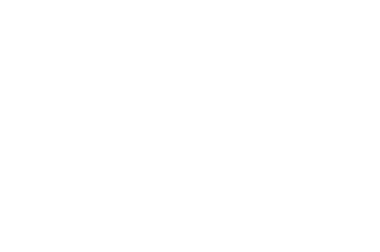

In [6]:
startOperation(model, True)

This is the end of this notebook.
It is the last phase of the project as well.
I hope it worked for you, or at least become usefull in some way.

by Duodecimo, 2017, Dezember.